# Exploitation des résultats

In [1]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import datetime

## Fusion des différents .csv

In [264]:
data_path = Path("C:/Users/ajard/OneDrive/Bureau/PONTS/MCNDU/PROJET/resultats/resultats_fin")
file_names = ["results_api_sirac", "results_api_velo", "results_api_parking_"]
df_parking = pd.DataFrame()
df_sirac = pd.DataFrame()
df_velo = pd.DataFrame()

In [265]:
for file in data_path.iterdir():
    file_name = file.name[:-14]
    print(file_name)
    df_file = pd.read_csv(file, sep = ";")
    

    if file_name == "results_api_sirac":
        df_sirac = pd.concat([df_sirac, df_file], ignore_index=True)

    elif file_name == "results_api_velo":
        df_velo = pd.concat([df_velo, df_file], ignore_index=True)
    
    else :
        df_parking = pd.concat([df_parking, df_file], ignore_index = True)

    

results_api_parking_
results_api_parking_
results_api_parking_
results_api_sirac
results_api_sirac
results_api_sirac
results_api_velo
results_api_velo
results_api_velo


In [266]:
df_parking.to_csv("api_parking_maj_2025_12_17.csv", index=False, sep = ";")
df_velo.to_csv("api_velo_maj_2025_12_17.csv", index=False, sep = ";")
df_sirac.to_csv("api_sirac_maj_2025_12_17.csv", index=False, sep = ";")

## Répartition par zone

In [2]:
path_parking = "C:/Users/ajard/OneDrive/Bureau/PONTS/MCNDU/PROJET/resultats4/api_parking_maj_2025_12_17.csv"
path_velo = "C:/Users/ajard/OneDrive/Bureau/PONTS/MCNDU/PROJET/resultats4/api_velo_maj_2025_12_17.csv"
path_sirac = "C:/Users/ajard/OneDrive/Bureau/PONTS/MCNDU/PROJET/resultats4/api_sirac_maj_2025_12_17.csv"

In [3]:
df_parking = pd.read_csv(path_parking, sep = ";")
df_parking = df_parking.rename(columns = {'nom_parking' : 'name'})
df_velo = pd.read_csv(path_velo, sep = ";")
df_velo = df_velo.rename(columns = {'na' : 'name', 'lat' : 'latitude', 'lon' : 'longitude'})
df_sirac = pd.read_csv(path_sirac, sep = ";")
list_df = [df_parking, df_velo, df_sirac]

coordinates_parking = {"name" : [], "lat" : [], "lon" : [], "zone" : []}
coordinates_velo = {"name" : [], "lat" : [], "lon" : [], "zone" : []}
coordinates_sirac = {"name" : [], "lat" : [], "lon" : [], "zone" : []}
list_coordinates = [coordinates_parking, coordinates_velo, coordinates_sirac]

In [4]:
for i, df in enumerate(list_df) :
    coordinates = list_coordinates[i]
    for index, row in df.iterrows():
        if row['name'] not in coordinates['name']:
            lat = row['latitude']
            lon = row['longitude']
            coordinates['name'].append(row['name'])
            coordinates['lat'].append(lat)
            coordinates['lon'].append(lon)
            if 48.574000<=lat<=48.589548 and 7.729512<=lon<=7.761337:
                coordinates['zone'].append(1)
            elif 48.546028<=lat<=48.614336 and 7.708821<=lon<=7.773942:
                coordinates['zone'].append(2)
            else :
                coordinates['zone'].append(3)

In [89]:
df_coordinates_parking = pd.DataFrame(coordinates_parking)
df_coordinates_velo = pd.DataFrame(coordinates_velo)
df_coordinates_sirac = pd.DataFrame(coordinates_sirac)

In [90]:
parking_PR = ["Parking Baggersee", "Parking Ducs d'Alsace", "Parking Elsau", "Parking Espace européen de l'entreprise",
              "Parking Hoenheim gare", "Parking Kibitzenau", "Parking Parc des Romains", "Parking Poteries", 
              "Parking Rives de l'Aar", "Parking Robertsau Boecklin","Parking Rotonde"] 

df_coordinates_parking['type'] = np.nan


for idx, row in df_coordinates_parking.iterrows():
    if row['name'] in parking_PR :
        df_coordinates_parking.at[idx, 'type'] = "P&R"

C:\Users\ajard\AppData\Local\Temp\ipykernel_57336\4091567197.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'P&R' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_coordinates_parking.at[idx, 'type'] = "P&R"


In [91]:
df_coordinates_parking

,name,lat,lon,zone,type
0,Parking Gare Wodli,48.587385,7.736771,1,NaN
1,Parking Zénith,48.595335,7.686467,3,NaN
2,Parking Centre Opéra Broglie,48.585689,7.749275,1,NaN
3,Parking Baggersee,48.544647,7.735695,3,P&R
4,Parking Bateliers,48.581002,7.756048,1,NaN
5,Parking Austerlitz,48.577964,7.751796,1,NaN
6,Parking Gutenberg,48.581561,7.748285,1,NaN
7,Parking Kleber Homme de fer,48.583497,7.745063,1,NaN
8,Parking Halles P1 Marais vert,48.587362,7.739375,1,NaN
9,Parking P2 Sebastopol,48.586790,7.742152,1,NaN


## Calcul de l'évolution du remplissage des parkings par zone

In [8]:
parking_zone1 = df_coordinates_parking[df_coordinates_parking['zone'] == 1]['name'].to_list()
parking_zone2 = df_coordinates_parking[df_coordinates_parking['zone'] == 2]['name'].to_list()
parking_zone3 = df_coordinates_parking[df_coordinates_parking['zone'] == 3]['name'].to_list()

In [9]:
df_parking = pd.read_csv("api_parking_maj_2025_12_17.csv", sep = ';')
df_parking = df_parking.rename(columns = {'nom_parking' : 'name'})
df_parking['time'] = pd.to_datetime(df_parking['time'])

In [10]:
df_parking = pd.merge(df_parking, df_coordinates_parking, on = 'name', how = 'inner' )
df_parking = df_parking[['name', 'time', 'total', 'libre', 'lat', 'lon', 'zone', 'type']]
df_parking['heure_arrondie'] = df_parking['time'].dt.floor('30T')
df_parking['demi_heure'] = df_parking['time'].dt.floor('30T').dt.time
df_parking['jour_semaine'] = df_parking['time'].dt.day_name()
df_parking['taux_remplissage'] = (df_parking['total'] - df_parking['libre'])/df_parking['total']

C:\Users\ajard\AppData\Local\Temp\ipykernel_57336\1416495119.py:3: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  df_parking['heure_arrondie'] = df_parking['time'].dt.floor('30T')
C:\Users\ajard\AppData\Local\Temp\ipykernel_57336\1416495119.py:4: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  df_parking['demi_heure'] = df_parking['time'].dt.floor('30T').dt.time


In [11]:
df_parking[df_parking['name']=='Parking Gare Wodli']

,name,time,total,libre,lat,lon,zone,type,heure_arrondie,demi_heure,jour_semaine,taux_remplissage
0,Parking Gare Wodli,2025-11-12 20:35:16,955,371,48.587385,7.736771,1,NaN,2025-11-12 20:30:00,20:30:00,Wednesday,0.611518
21,Parking Gare Wodli,2025-11-12 21:05:17,955,365,48.587385,7.736771,1,NaN,2025-11-12 21:00:00,21:00:00,Wednesday,0.617801
42,Parking Gare Wodli,2025-11-12 21:35:17,955,371,48.587385,7.736771,1,NaN,2025-11-12 21:30:00,21:30:00,Wednesday,0.611518
63,Parking Gare Wodli,2025-11-12 22:05:18,955,375,48.587385,7.736771,1,NaN,2025-11-12 22:00:00,22:00:00,Wednesday,0.607330
84,Parking Gare Wodli,2025-11-12 22:35:19,955,371,48.587385,7.736771,1,NaN,2025-11-12 22:30:00,22:30:00,Wednesday,0.611518
...,...,...,...,...,...,...,...,...,...,...,...,...
33159,Parking Gare Wodli,2025-12-17 11:06:24,955,55,48.587385,7.736771,1,NaN,2025-12-17 11:00:00,11:00:00,Wednesday,0.942408
33180,Parking Gare Wodli,2025-12-17 11:36:26,955,62,48.587385,7.736771,1,NaN,2025-12-17 11:30:00,11:30:00,Wednesday,0.935079
33201,Parking Gare Wodli,2025-12-17 12:06:34,955,48,48.587385,7.736771,1,NaN,2025-12-17 12:00:00,12:00:00,Wednesday,0.949738
33222,Parking Gare Wodli,2025-12-17 12:36:35,955,48,48.587385,7.736771,1,NaN,2025-12-17 12:30:00,12:30:00,Wednesday,0.949738


In [12]:
avg_libre_par_heure1 = df_parking[df_parking['zone']==1].groupby('heure_arrondie')['libre'].mean().reset_index()
avg_libre_par_heure2 = df_parking[df_parking['zone']==2].groupby('heure_arrondie')['libre'].mean().reset_index()
avg_libre_par_heure3 = df_parking[df_parking['zone']==3].groupby('heure_arrondie')['libre'].mean().reset_index()

<Axes: title={'center': 'Nombre de places libres en moyenne dans les parkings de la zone 3'}, xlabel='heure'>

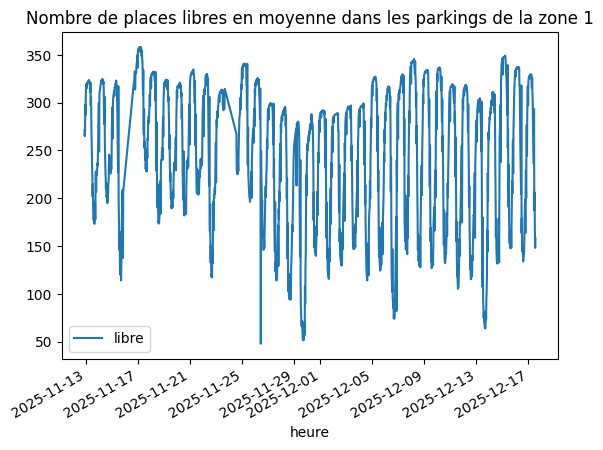

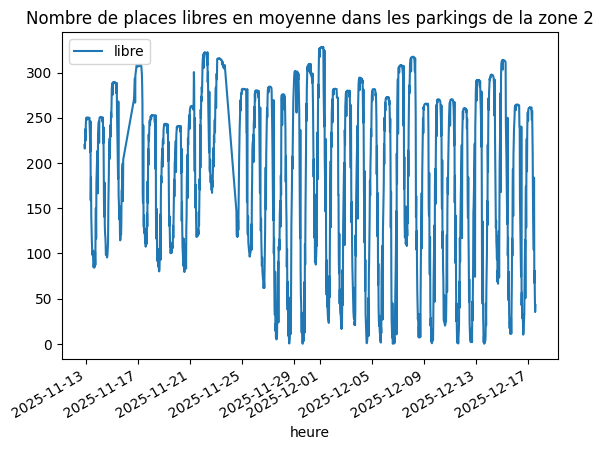

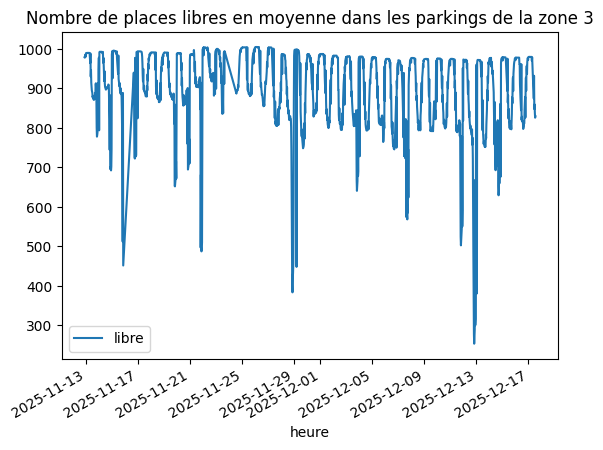

In [13]:
avg_libre_par_heure1.plot(x = "heure_arrondie", y = "libre", title = "Nombre de places libres en moyenne dans les parkings de la zone 1", xlabel="heure")
avg_libre_par_heure2.plot(x = "heure_arrondie", y = "libre",title = "Nombre de places libres en moyenne dans les parkings de la zone 2", xlabel="heure")
avg_libre_par_heure3.plot(x = "heure_arrondie", y = "libre",title = "Nombre de places libres en moyenne dans les parkings de la zone 3", xlabel="heure")

<Axes: title={'center': 'Nombre de places libres en moyenne dans les parkings classiques'}, xlabel='heure'>

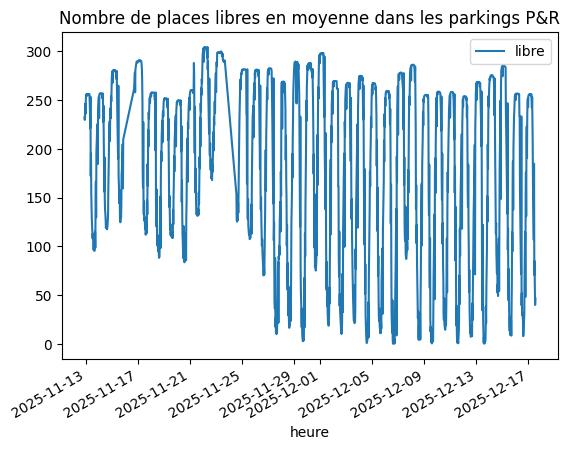

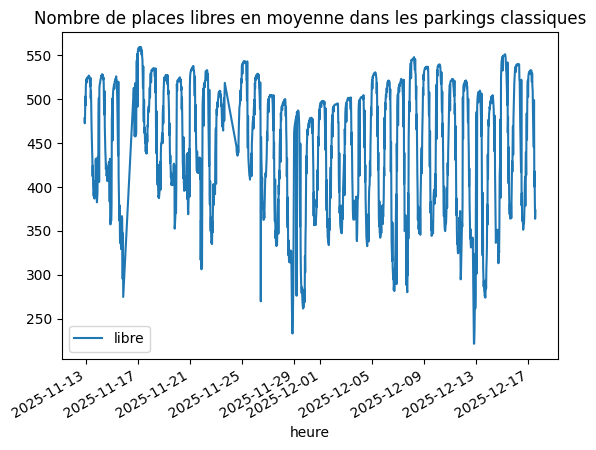

In [14]:
avg_libre_par_heure_PR = df_parking[df_parking['type']=="P&R"].groupby('heure_arrondie')['libre'].mean().reset_index()
avg_libre_par_heure_classique = df_parking[df_parking['type']!="P&R"].groupby('heure_arrondie')['libre'].mean().reset_index()
avg_libre_par_heure_PR.plot(x = "heure_arrondie", y = "libre", title = "Nombre de places libres en moyenne dans les parkings P&R", xlabel="heure")
avg_libre_par_heure_classique.plot(x = "heure_arrondie", y = "libre", title = "Nombre de places libres en moyenne dans les parkings classiques", xlabel="heure")

## Journée type

In [15]:
jour_ouvre = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
week_end = ['Saturday', 'Sunday']
debut_marche = pd.to_datetime('2025-11-26')

In [16]:
df_parking_avant_marche = df_parking[df_parking['time']<debut_marche]
df_parking_apres_marche = df_parking[df_parking['time']>=debut_marche]

df_parking_avant_marche_1 = df_parking_avant_marche[df_parking_avant_marche['zone']==1]
df_parking_avant_marche_2 = df_parking_avant_marche[df_parking_avant_marche['zone']==2]
df_parking_avant_marche_3 = df_parking_avant_marche[df_parking_avant_marche['zone']==3]

df_parking_apres_marche_1 = df_parking_apres_marche[df_parking_apres_marche['zone']==1]
df_parking_apres_marche_2 = df_parking_apres_marche[df_parking_apres_marche['zone']==2]
df_parking_apres_marche_3 = df_parking_apres_marche[df_parking_apres_marche['zone']==3]

C:\Users\ajard\AppData\Local\Temp\ipykernel_57336\802297824.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_parking_avant_marche_1_ouvre.index = pd.to_datetime(df_parking_avant_marche_1_ouvre.index.astype(str))
C:\Users\ajard\AppData\Local\Temp\ipykernel_57336\802297824.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_parking_apres_marche_1_ouvre.index = pd.to_datetime(df_parking_apres_marche_1_ouvre.index.astype(str))


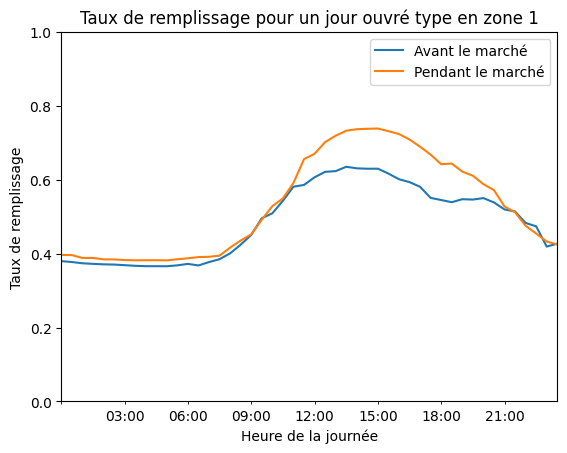

In [125]:
# Journée type en jour ouvré zone 1
df_parking_avant_marche_1_ouvre = df_parking_avant_marche_1[df_parking_avant_marche_1['jour_semaine'].isin(jour_ouvre)].groupby('demi_heure')['taux_remplissage'].mean()
df_parking_apres_marche_1_ouvre = df_parking_apres_marche_1[df_parking_apres_marche_1['jour_semaine'].isin(jour_ouvre)].groupby('demi_heure')['taux_remplissage'].mean()

df_parking_avant_marche_1_ouvre.index = pd.to_datetime(df_parking_avant_marche_1_ouvre.index.astype(str))
df_parking_apres_marche_1_ouvre.index = pd.to_datetime(df_parking_apres_marche_1_ouvre.index.astype(str))

ax = df_parking_avant_marche_1_ouvre.plot(title = 'Taux de remplissage pour un jour ouvré type en zone 1',
                                          x= df_parking_avant_marche_1_ouvre.index,
                                          ylabel = 'Taux de remplissage',
                                          xlabel = 'Heure de la journée',
                                          label= "Avant le marché")

df_parking_apres_marche_1_ouvre.plot(ax = ax,
                                     x= df_parking_avant_marche_1_ouvre.index,
                                     title = 'Taux de remplissage pour un jour ouvré type en zone 1', 
                                     ylabel = 'Taux de remplissage',
                                     xlabel = 'Heure de la journée',
                                     label= "Pendant le marché",
                                     ylim = (0,1)
                                     )

import matplotlib.dates as mdates

ax.xaxis.set_major_locator(mdates.HourLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))

plt.legend()


C:\Users\ajard\AppData\Local\Temp\ipykernel_57336\3822572589.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_parking_avant_marche_2_ouvre.index = pd.to_datetime(df_parking_avant_marche_2_ouvre.index.astype(str))
C:\Users\ajard\AppData\Local\Temp\ipykernel_57336\3822572589.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_parking_apres_marche_2_ouvre.index = pd.to_datetime(df_parking_apres_marche_2_ouvre.index.astype(str))


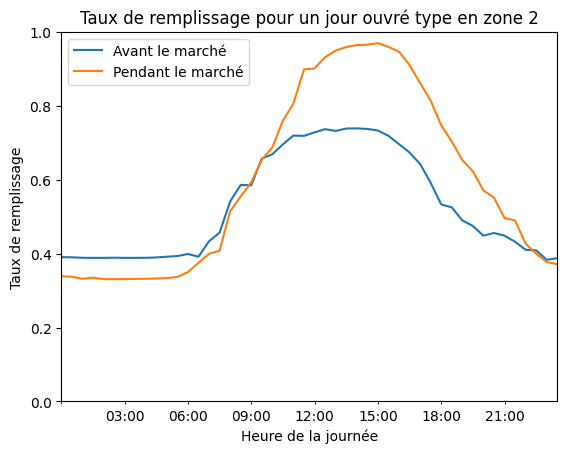

In [126]:
# Journée type en jour ouvré zone 2

df_parking_avant_marche_2_ouvre = df_parking_avant_marche_2[df_parking_avant_marche_2['jour_semaine'].isin(jour_ouvre)].groupby('demi_heure')['taux_remplissage'].mean()
df_parking_apres_marche_2_ouvre = df_parking_apres_marche_2[df_parking_apres_marche_2['jour_semaine'].isin(jour_ouvre)].groupby('demi_heure')['taux_remplissage'].mean()

df_parking_avant_marche_2_ouvre.index = pd.to_datetime(df_parking_avant_marche_2_ouvre.index.astype(str))
df_parking_apres_marche_2_ouvre.index = pd.to_datetime(df_parking_apres_marche_2_ouvre.index.astype(str))

ax = df_parking_avant_marche_2_ouvre.plot(title = 'Taux de remplissage pour un jour ouvré type en zone 2', 
                                     x= df_parking_avant_marche_1_ouvre.index,
                                     ylabel = 'Taux de remplissage',
                                     xlabel = 'Heure de la journée',
                                     label= "Avant le marché")

df_parking_apres_marche_2_ouvre.plot(ax = ax,
                                     title = 'Taux de remplissage pour un jour ouvré type en zone 2', 
                                     ylabel = 'Taux de remplissage',
                                     xlabel = 'Heure de la journée',
                                     label= "Pendant le marché",
                                     ylim = (0,1))

ax.xaxis.set_major_locator(mdates.HourLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))

plt.legend()

In [76]:
df_parking_apres_marche_2_ouvre.max() 

np.float64(0.9695073099415205)

In [77]:
var = (df_parking_apres_marche_2_ouvre.max() - df_parking_avant_marche_2_ouvre.max())/df_parking_avant_marche_2_ouvre.max()
print("Variation avant/après marché : ", var)

Variation avant/après marché :  0.31224170006760965


C:\Users\ajard\AppData\Local\Temp\ipykernel_57336\662238680.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_parking_avant_marche_3_ouvre.index = pd.to_datetime(df_parking_avant_marche_3_ouvre.index.astype(str))
C:\Users\ajard\AppData\Local\Temp\ipykernel_57336\662238680.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_parking_apres_marche_3_ouvre.index = pd.to_datetime(df_parking_apres_marche_3_ouvre.index.astype(str))


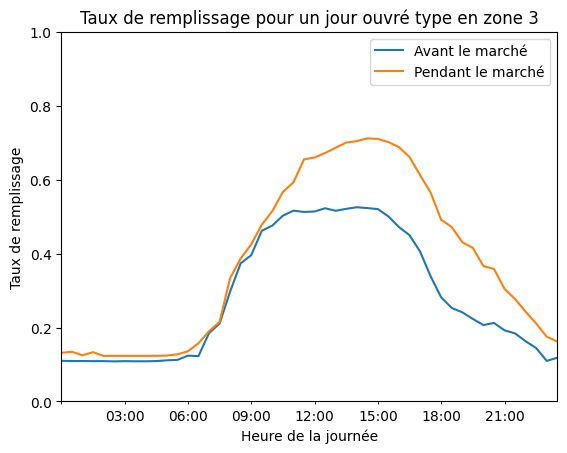

In [127]:
# Journée type en jour ouvré zone 3

df_parking_avant_marche_3_ouvre = df_parking_avant_marche_3[df_parking_avant_marche_3['jour_semaine'].isin(jour_ouvre)].groupby('demi_heure')['taux_remplissage'].mean()
df_parking_apres_marche_3_ouvre = df_parking_apres_marche_3[df_parking_apres_marche_3['jour_semaine'].isin(jour_ouvre)].groupby('demi_heure')['taux_remplissage'].mean()

df_parking_avant_marche_3_ouvre.index = pd.to_datetime(df_parking_avant_marche_3_ouvre.index.astype(str))
df_parking_apres_marche_3_ouvre.index = pd.to_datetime(df_parking_apres_marche_3_ouvre.index.astype(str))

ax = df_parking_avant_marche_3_ouvre.plot(title = 'Taux de remplissage pour un jour ouvré type en zone 3', 
                                          x= df_parking_apres_marche_3_ouvre.index,
                                          ylabel = 'Taux de remplissage',
                                          xlabel = 'Heure de la journée',
                                          label= "Avant le marché")

df_parking_apres_marche_3_ouvre.plot(title = 'Taux de remplissage pour un jour ouvré type en zone 3', 
                                     x = df_parking_apres_marche_3_ouvre.index ,
                                     ax = ax,
                                     ylabel = 'Taux de remplissage',
                                     xlabel = 'Heure de la journée',
                                     label= "Pendant le marché",
                                     ylim = (0,1))

ax.xaxis.set_major_locator(mdates.HourLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))

plt.legend()

C:\Users\ajard\AppData\Local\Temp\ipykernel_57336\2997599749.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_parking_avant_marche_1_we.index = pd.to_datetime(df_parking_avant_marche_1_we.index.astype(str))
C:\Users\ajard\AppData\Local\Temp\ipykernel_57336\2997599749.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_parking_apres_marche_1_we.index = pd.to_datetime(df_parking_apres_marche_1_we.index.astype(str))


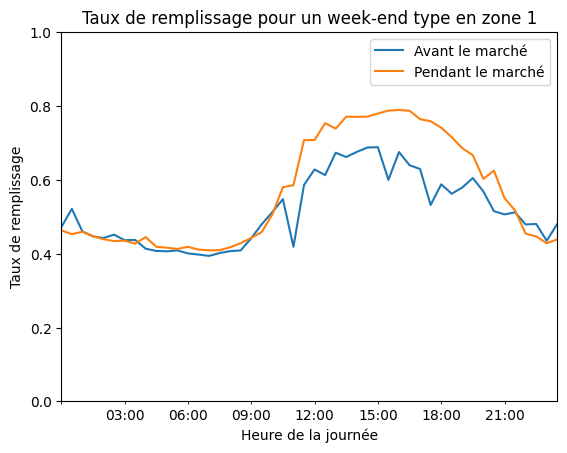

In [128]:
# Journée type en week-end zone 1

df_parking_avant_marche_1_we = df_parking_avant_marche_1[df_parking_avant_marche_1['jour_semaine'].isin(week_end)].groupby('demi_heure')['taux_remplissage'].mean()
df_parking_apres_marche_1_we = df_parking_apres_marche_1[df_parking_apres_marche_1['jour_semaine'].isin(week_end)].groupby('demi_heure')['taux_remplissage'].mean()

df_parking_avant_marche_1_we.index = pd.to_datetime(df_parking_avant_marche_1_we.index.astype(str))
df_parking_apres_marche_1_we.index = pd.to_datetime(df_parking_apres_marche_1_we.index.astype(str))

ax = df_parking_avant_marche_1_we.plot(title = 'Taux de remplissage pour un week-end type en zone 1', 
                                       x = df_parking_avant_marche_1_we.index ,
                                       ylabel = 'Taux de remplissage',
                                       xlabel = 'Heure de la journée',
                                       label= "Avant le marché")

df_parking_apres_marche_1_we.plot(ax = ax,
                                  title = 'Taux de remplissage pour un week-end type en zone 1', 
                                  x = df_parking_avant_marche_1_we.index ,
                                  ylabel = 'Taux de remplissage',
                                  xlabel = 'Heure de la journée',
                                  label= "Pendant le marché",
                                  ylim = (0,1))

ax.xaxis.set_major_locator(mdates.HourLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))

plt.legend()

C:\Users\ajard\AppData\Local\Temp\ipykernel_57336\1924696253.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_parking_avant_marche_2_we.index = pd.to_datetime(df_parking_avant_marche_2_we.index.astype(str))
C:\Users\ajard\AppData\Local\Temp\ipykernel_57336\1924696253.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_parking_apres_marche_2_we.index = pd.to_datetime(df_parking_apres_marche_2_we.index.astype(str))


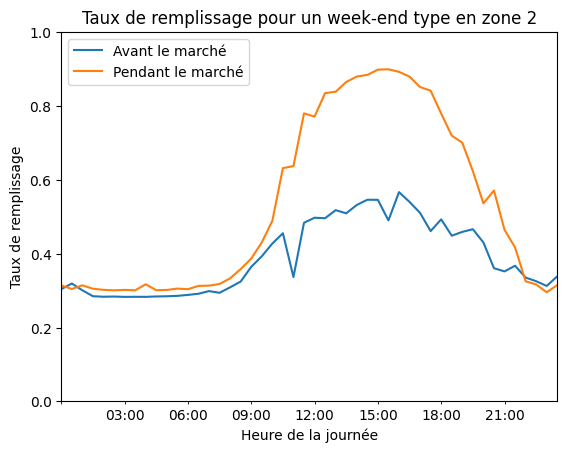

In [129]:
# Journée type en week-end zone 2

df_parking_avant_marche_2_we = df_parking_avant_marche_2[df_parking_avant_marche_2['jour_semaine'].isin(week_end)].groupby('demi_heure')['taux_remplissage'].mean()
df_parking_apres_marche_2_we = df_parking_apres_marche_2[df_parking_apres_marche_2['jour_semaine'].isin(week_end)].groupby('demi_heure')['taux_remplissage'].mean()

df_parking_avant_marche_2_we.index = pd.to_datetime(df_parking_avant_marche_2_we.index.astype(str))
df_parking_apres_marche_2_we.index = pd.to_datetime(df_parking_apres_marche_2_we.index.astype(str))

ax = df_parking_avant_marche_2_we.plot(title = 'Taux de remplissage pour un week-end type en zone 2', 
                                       x = df_parking_avant_marche_2_we.index,
                                       ylabel = 'Taux de remplissage',
                                       xlabel = 'Heure de la journée',
                                       label= "Avant le marché")

df_parking_apres_marche_2_we.plot(ax = ax,
                                  x = df_parking_avant_marche_2_we.index,
                                  title = 'Taux de remplissage pour un week-end type en zone 2', 
                                  ylabel = 'Taux de remplissage',
                                  xlabel = 'Heure de la journée',
                                  label= "Pendant le marché",
                                  ylim = (0,1))

ax.xaxis.set_major_locator(mdates.HourLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))

plt.legend()

C:\Users\ajard\AppData\Local\Temp\ipykernel_57336\3671597448.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_parking_avant_marche_3_we.index = pd.to_datetime(df_parking_avant_marche_3_we.index.astype(str))
C:\Users\ajard\AppData\Local\Temp\ipykernel_57336\3671597448.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_parking_apres_marche_3_we.index = pd.to_datetime(df_parking_apres_marche_3_we.index.astype(str))


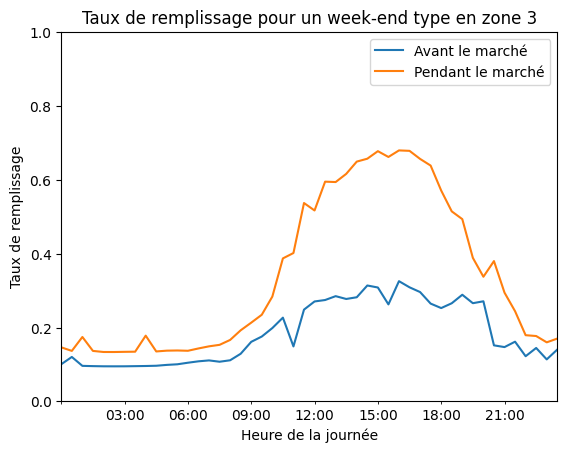

In [130]:
# Journée type en week-end zone 3

df_parking_avant_marche_3_we = df_parking_avant_marche_3[df_parking_avant_marche_3['jour_semaine'].isin(week_end)].groupby('demi_heure')['taux_remplissage'].mean()
df_parking_apres_marche_3_we = df_parking_apres_marche_3[df_parking_apres_marche_3['jour_semaine'].isin(week_end)].groupby('demi_heure')['taux_remplissage'].mean()

df_parking_avant_marche_3_we.index = pd.to_datetime(df_parking_avant_marche_3_we.index.astype(str))
df_parking_apres_marche_3_we.index = pd.to_datetime(df_parking_apres_marche_3_we.index.astype(str))

ax = df_parking_avant_marche_3_we.plot(x = df_parking_avant_marche_3_we.index,
                                       title = 'Taux de remplissage pour un week-end type en zone 3', 
                                       ylabel = 'Taux de remplissage',
                                       label= "Avant le marché")

df_parking_apres_marche_3_we.plot(ax=ax,
                                  x = df_parking_avant_marche_3_we.index,
                                  title = 'Taux de remplissage pour un week-end type en zone 3', 
                                  ylabel = 'Taux de remplissage',
                                  xlabel = 'Heure de la journée',
                                  label= "Pendant le marché",
                                  ylim = (0,1))

ax.xaxis.set_major_locator(mdates.HourLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))

plt.legend()

## Semaine type

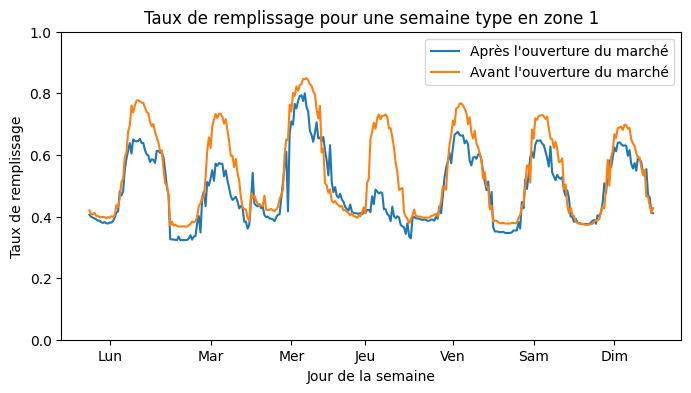

In [71]:
df_parking_avant_marche_semaine_1 = df_parking_avant_marche_1.groupby(['jour_semaine', 'demi_heure'])['taux_remplissage'].mean()
df_parking_avant_marche_semaine_1_1d = df_parking_avant_marche_semaine_1.reset_index()
df_parking_apres_marche_semaine_1 = df_parking_apres_marche_1.groupby(['jour_semaine', 'demi_heure'])['taux_remplissage'].mean()
df_parking_apres_marche_semaine_1_1d = df_parking_apres_marche_semaine_1.reset_index()

fig, ax = plt.subplots(figsize=(8, 4))

df_parking_avant_marche_semaine_1_1d['taux_remplissage'].plot(ax = ax,
                                       title = 'Taux de remplissage pour une semaine type en zone 1', 
                                       ylabel = 'Taux de remplissage',
                                       xlabel = 'Jour de la semaine',
                                       label= "Après l'ouverture du marché",
                                       ylim = (0,1),
                                       )

df_parking_apres_marche_semaine_1_1d['taux_remplissage'].plot(ax = ax,
                                       title = 'Taux de remplissage pour une semaine type en zone 1', 
                                       ylabel = 'Taux de remplissage',
                                       xlabel = 'Jour de la semaine',
                                       label= "Avant l'ouverture du marché",
                                       ylim = (0,1),
                                       )

plt.xticks(
    ticks=[12, 72, 120, 164, 216, 264, 312],
    labels=['Lun', 'Mar', 'Mer', 'Jeu', 'Ven', 'Sam', 'Dim']
)

plt.legend()

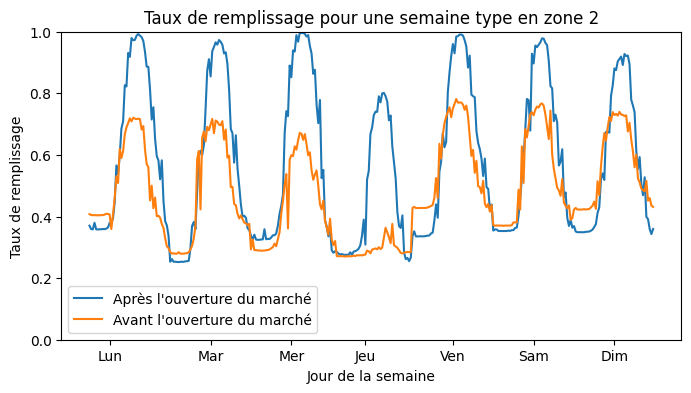

In [72]:
df_parking_avant_marche_semaine_2 = df_parking_avant_marche_2.groupby(['jour_semaine', 'demi_heure'])['taux_remplissage'].mean()
df_parking_avant_marche_semaine_2_1d = df_parking_avant_marche_semaine_2.reset_index()
df_parking_apres_marche_semaine_2 = df_parking_apres_marche_2.groupby(['jour_semaine', 'demi_heure'])['taux_remplissage'].mean()
df_parking_apres_marche_semaine_2_1d = df_parking_apres_marche_semaine_2.reset_index()

fig, ax = plt.subplots(figsize=(8, 4))

df_parking_apres_marche_semaine_2_1d['taux_remplissage'].plot(ax = ax,
                                       title = 'Taux de remplissage pour une semaine type en zone 2', 
                                       ylabel = 'Taux de remplissage',
                                       xlabel = 'Jour de la semaine',
                                       label= "Après l'ouverture du marché",
                                       ylim = (0,1),
                                       )

df_parking_avant_marche_semaine_2_1d['taux_remplissage'].plot(ax = ax,
                                       title = 'Taux de remplissage pour une semaine type en zone 2', 
                                       ylabel = 'Taux de remplissage',
                                       xlabel = 'Jour de la semaine',
                                       label= "Avant l'ouverture du marché",
                                       ylim = (0,1),
                                       )

plt.xticks(
    ticks=[12, 72, 120, 164, 216, 264, 312],
    labels=['Lun', 'Mar', 'Mer', 'Jeu', 'Ven', 'Sam', 'Dim']
)

plt.legend()

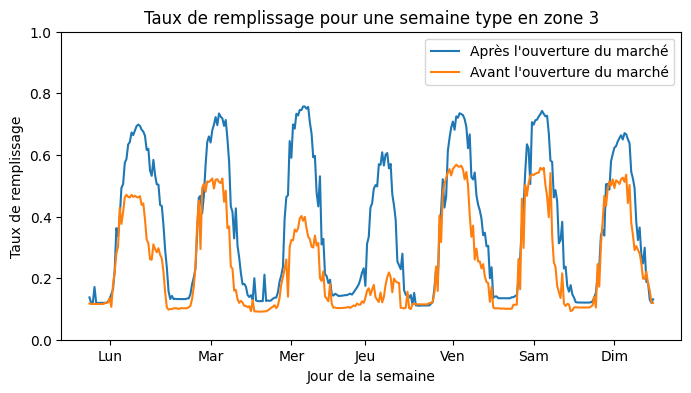

In [73]:
df_parking_avant_marche_semaine_3 = df_parking_avant_marche_3.groupby(['jour_semaine', 'demi_heure'])['taux_remplissage'].mean()
df_parking_avant_marche_semaine_3_1d = df_parking_avant_marche_semaine_3.reset_index()
df_parking_apres_marche_semaine_3 = df_parking_apres_marche_3.groupby(['jour_semaine', 'demi_heure'])['taux_remplissage'].mean()
df_parking_apres_marche_semaine_3_1d = df_parking_apres_marche_semaine_3.reset_index()

fig, ax = plt.subplots(figsize=(8, 4))

df_parking_apres_marche_semaine_3_1d['taux_remplissage'].plot(ax = ax,
                                       title = 'Taux de remplissage pour une semaine type en zone 3', 
                                       ylabel = 'Taux de remplissage',
                                       xlabel = 'Jour de la semaine',
                                       label= "Après l'ouverture du marché",
                                       ylim = (0,1),
                                       )

df_parking_avant_marche_semaine_3_1d['taux_remplissage'].plot(ax = ax,
                                       title = 'Taux de remplissage pour une semaine type en zone 3', 
                                       ylabel = 'Taux de remplissage',
                                       xlabel = 'Jour de la semaine',
                                       label= "Avant l'ouverture du marché",
                                       ylim = (0,1),
                                       )

plt.xticks(
    ticks=[12, 72, 120, 164, 216, 264, 312],
    labels=['Lun', 'Mar', 'Mer', 'Jeu', 'Ven', 'Sam', 'Dim']
)

plt.legend()

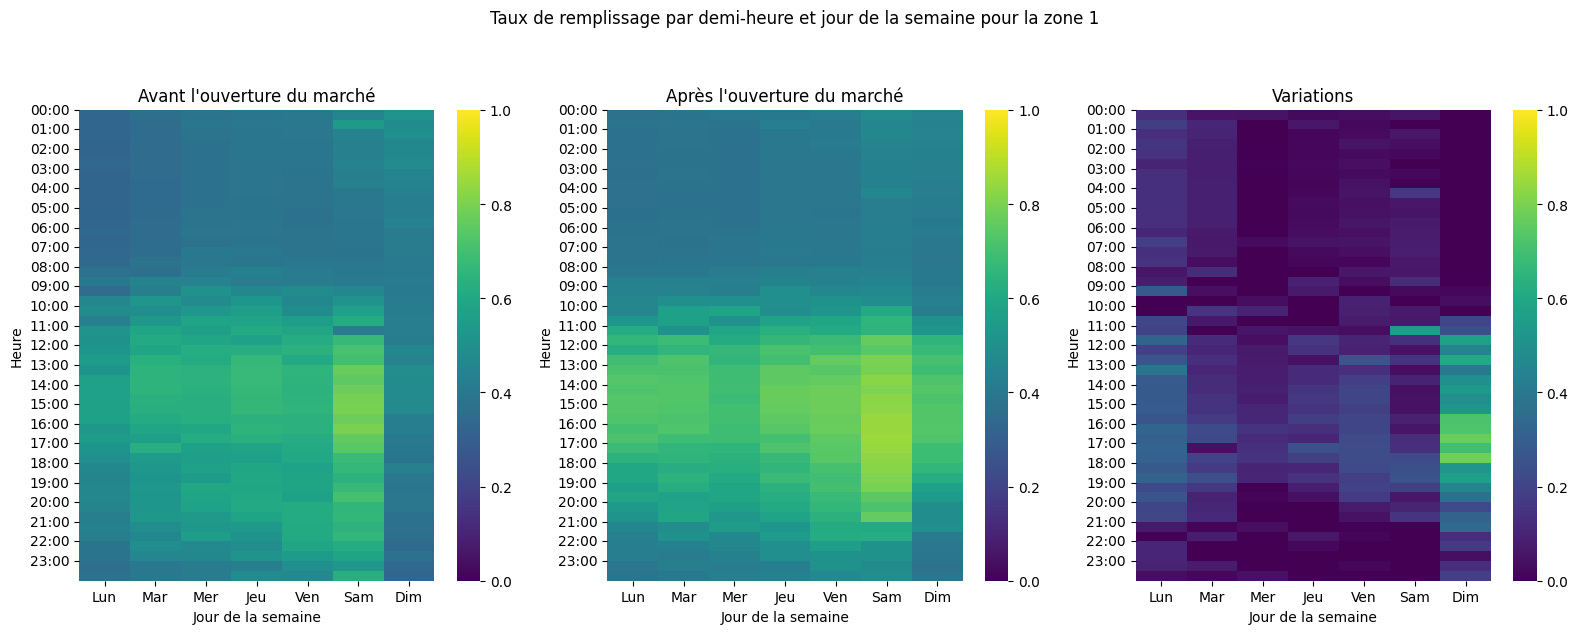

In [133]:
# Réorganiser les colonnes dans l'ordre des jours (Lundi à Dimanche)
jours_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Créer les DataFrames 2D
semaine_type_avant = df_parking_avant_marche_semaine_1.unstack(level=0)[jours_order]
semaine_type_apres = df_parking_apres_marche_semaine_1.unstack(level=0)[jours_order]
variation = (semaine_type_apres - semaine_type_avant)/semaine_type_avant

# Créer une figure avec deux sous-graphiques côte à côte
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16, 6))

vmin_global = 0
vmax_global = 1

# Créer les étiquettes des heures pleines
yticklabels = [f"{h:02d}:00" for h in range(24)]

# Heatmap pour "Avant l'ouverture du marché"
sns.heatmap(
    semaine_type_avant,
    cmap='viridis',
    annot=False,
    ax=ax1,  # Utiliser le premier sous-graphique
    xticklabels=['Lun', 'Mar', 'Mer', 'Jeu', 'Ven', 'Sam', 'Dim'],
    yticklabels=yticklabels[::2] if len(yticklabels) == 48 else yticklabels,
    vmin = vmin_global,
    vmax = vmax_global
)
ax1.set_title("Avant l'ouverture du marché")
ax1.set_yticks(range(0, 48, 2))
ax1.set_yticklabels(yticklabels)
ax1.set_xlabel("Jour de la semaine")
ax1.set_ylabel("Heure")

# Heatmap pour "Après l'ouverture du marché"
sns.heatmap(
    semaine_type_apres,
    cmap='viridis',
    annot=False,
    ax=ax2,  # Utiliser le deuxième sous-graphique
    xticklabels=['Lun', 'Mar', 'Mer', 'Jeu', 'Ven', 'Sam', 'Dim'],
    yticklabels=yticklabels[::2] if len(yticklabels) == 48 else yticklabels,
    vmin = vmin_global,
    vmax = vmax_global
)
ax2.set_title("Après l'ouverture du marché")
ax2.set_yticks(range(0, 48, 2))
ax2.set_yticklabels(yticklabels)
ax2.set_xlabel("Jour de la semaine")
ax2.set_ylabel("Heure")

# Heatmap pour "Variation"
sns.heatmap(
    variation,
    cmap='viridis',
    annot=False,
    ax=ax3,  # Utiliser le deuxième sous-graphique
    xticklabels=['Lun', 'Mar', 'Mer', 'Jeu', 'Ven', 'Sam', 'Dim'],
    yticklabels=yticklabels[::2] if len(yticklabels) == 48 else yticklabels,
    vmin = vmin_global,
    vmax = vmax_global
)
ax3.set_title("Variations")
ax3.set_yticks(range(0, 48, 2))
ax3.set_yticklabels(yticklabels)
ax3.set_xlabel("Jour de la semaine")
ax3.set_ylabel("Heure")

# Ajuster la mise en page
plt.suptitle("Taux de remplissage par demi-heure et jour de la semaine pour la zone 1", y=1.05)
plt.tight_layout()
plt.show()

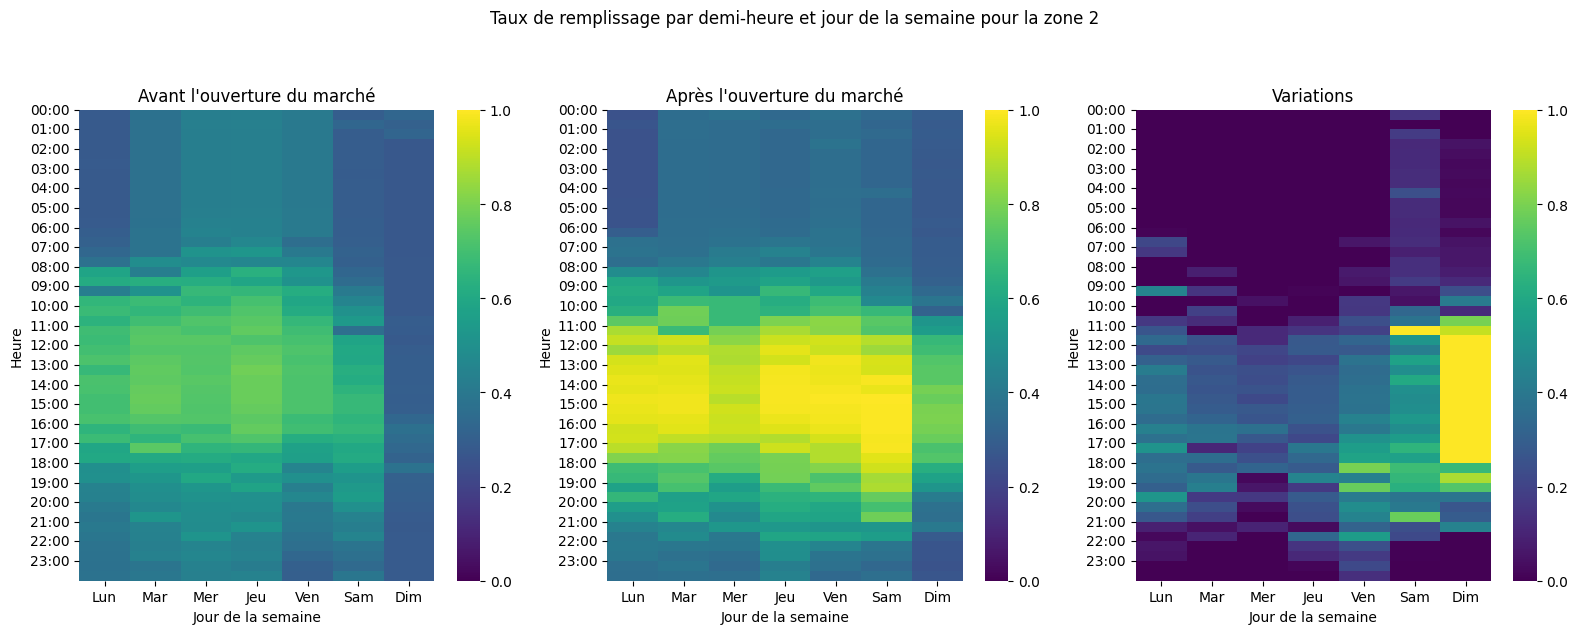

In [135]:
# Réorganiser les colonnes dans l'ordre des jours (Lundi à Dimanche)
jours_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Créer les DataFrames 2D
semaine_type_avant = df_parking_avant_marche_semaine_2.unstack(level=0)[jours_order]
semaine_type_apres = df_parking_apres_marche_semaine_2.unstack(level=0)[jours_order]
variation = (semaine_type_apres - semaine_type_avant)/semaine_type_avant


# Créer une figure avec deux sous-graphiques côte à côte
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16, 6))

vmin_global = 0
vmax_global = 1

# Créer les étiquettes des heures pleines
yticklabels = [f"{h:02d}:00" for h in range(24)]

# Heatmap pour "Avant l'ouverture du marché"
sns.heatmap(
    semaine_type_avant,
    cmap='viridis',
    annot=False,
    ax=ax1,  # Utiliser le premier sous-graphique
    xticklabels=['Lun', 'Mar', 'Mer', 'Jeu', 'Ven', 'Sam', 'Dim'],
    yticklabels=yticklabels[::2] if len(yticklabels) == 48 else yticklabels,
    vmin = vmin_global,
    vmax = vmax_global
)
ax1.set_title("Avant l'ouverture du marché")
ax1.set_yticks(range(0, 48, 2))
ax1.set_yticklabels(yticklabels)
ax1.set_xlabel("Jour de la semaine")
ax1.set_ylabel("Heure")

# Heatmap pour "Après l'ouverture du marché"
sns.heatmap(
    semaine_type_apres,
    cmap='viridis',
    annot=False,
    ax=ax2,  # Utiliser le deuxième sous-graphique
    xticklabels=['Lun', 'Mar', 'Mer', 'Jeu', 'Ven', 'Sam', 'Dim'],
    yticklabels=yticklabels[::2] if len(yticklabels) == 48 else yticklabels,
    vmin = vmin_global,
    vmax = vmax_global
)
ax2.set_title("Après l'ouverture du marché")
ax2.set_yticks(range(0, 48, 2))
ax2.set_yticklabels(yticklabels)
ax2.set_xlabel("Jour de la semaine")
ax2.set_ylabel("Heure")

# Heatmap pour "Variation"
sns.heatmap(
    variation,
    cmap='viridis',
    annot=False,
    ax=ax3,  # Utiliser le deuxième sous-graphique
    xticklabels=['Lun', 'Mar', 'Mer', 'Jeu', 'Ven', 'Sam', 'Dim'],
    yticklabels=yticklabels[::2] if len(yticklabels) == 48 else yticklabels,
    vmin = vmin_global,
    vmax = vmax_global
)
ax3.set_title("Variations")
ax3.set_yticks(range(0, 48, 2))
ax3.set_yticklabels(yticklabels)
ax3.set_xlabel("Jour de la semaine")
ax3.set_ylabel("Heure")

# Ajuster la mise en page
plt.suptitle("Taux de remplissage par demi-heure et jour de la semaine pour la zone 2", y=1.05)
plt.tight_layout()
plt.show()

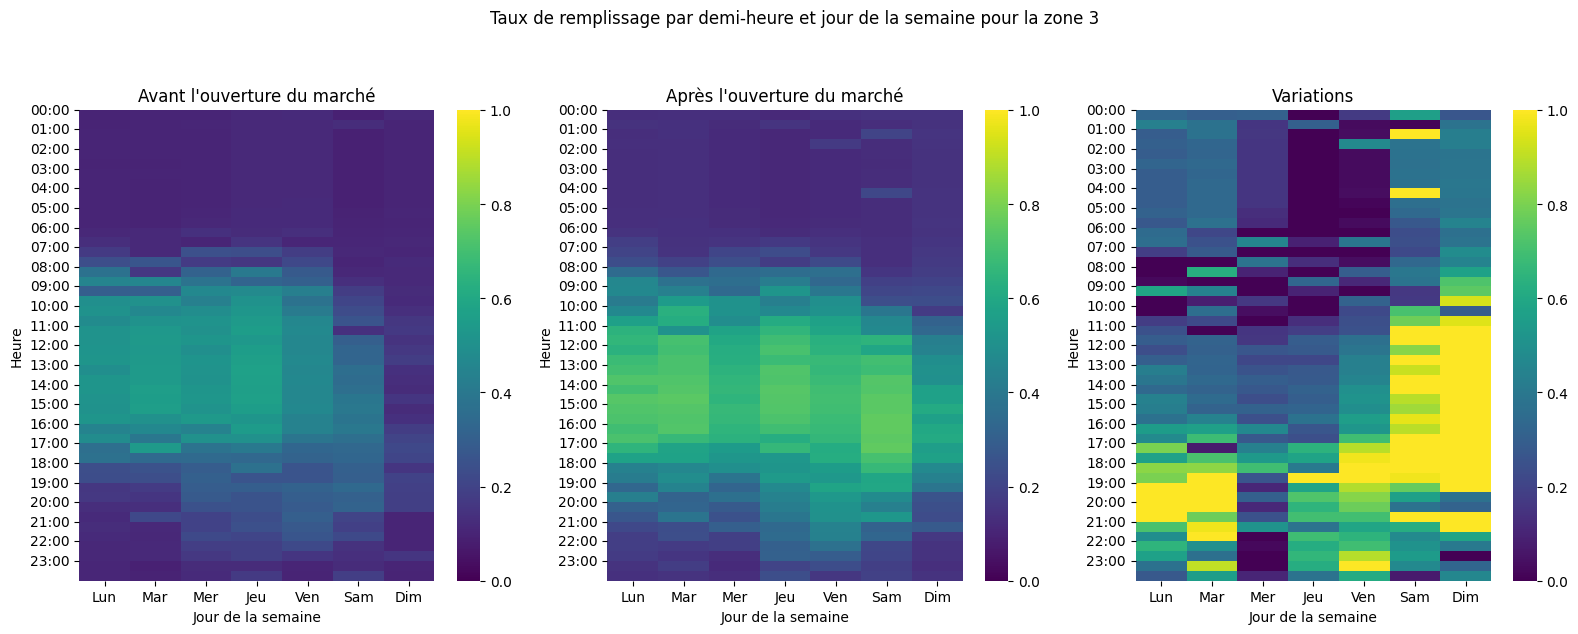

In [136]:
# Réorganiser les colonnes dans l'ordre des jours (Lundi à Dimanche)
jours_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Créer les DataFrames 2D
semaine_type_avant = df_parking_avant_marche_semaine_3.unstack(level=0)[jours_order]
semaine_type_apres = df_parking_apres_marche_semaine_3.unstack(level=0)[jours_order]
variation = (semaine_type_apres - semaine_type_avant)/semaine_type_avant

# Créer une figure avec deux sous-graphiques côte à côte
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16, 6))

vmin_global = 0
vmax_global = 1

# Créer les étiquettes des heures pleines
yticklabels = [f"{h:02d}:00" for h in range(24)]

# Heatmap pour "Avant l'ouverture du marché"
sns.heatmap(
    semaine_type_avant,
    cmap='viridis',
    annot=False,
    ax=ax1,  # Utiliser le premier sous-graphique
    xticklabels=['Lun', 'Mar', 'Mer', 'Jeu', 'Ven', 'Sam', 'Dim'],
    yticklabels=yticklabels[::2] if len(yticklabels) == 48 else yticklabels,
    vmin = vmin_global,
    vmax = vmax_global
)
ax1.set_title("Avant l'ouverture du marché")
ax1.set_yticks(range(0, 48, 2))
ax1.set_yticklabels(yticklabels)
ax1.set_xlabel("Jour de la semaine")
ax1.set_ylabel("Heure")

# Heatmap pour "Après l'ouverture du marché"
sns.heatmap(
    semaine_type_apres,
    cmap='viridis',
    annot=False,
    ax=ax2,  # Utiliser le deuxième sous-graphique
    xticklabels=['Lun', 'Mar', 'Mer', 'Jeu', 'Ven', 'Sam', 'Dim'],
    yticklabels=yticklabels[::2] if len(yticklabels) == 48 else yticklabels,
    vmin = vmin_global,
    vmax = vmax_global
)
ax2.set_title("Après l'ouverture du marché")
ax2.set_yticks(range(0, 48, 2))
ax2.set_yticklabels(yticklabels)
ax2.set_xlabel("Jour de la semaine")
ax2.set_ylabel("Heure")

# Heatmap pour "Variation"
sns.heatmap(
    variation,
    cmap='viridis',
    annot=False,
    ax=ax3,  # Utiliser le deuxième sous-graphique
    xticklabels=['Lun', 'Mar', 'Mer', 'Jeu', 'Ven', 'Sam', 'Dim'],
    yticklabels=yticklabels[::2] if len(yticklabels) == 48 else yticklabels,
    vmin = vmin_global,
    vmax = vmax_global
)
ax3.set_title("Variations")
ax3.set_yticks(range(0, 48, 2))
ax3.set_yticklabels(yticklabels)
ax3.set_xlabel("Jour de la semaine")
ax3.set_ylabel("Heure")


# Ajuster la mise en page
plt.suptitle("Taux de remplissage par demi-heure et jour de la semaine pour la zone 3", y=1.05)
plt.tight_layout()
plt.show()

## Représentation avec une carte

In [93]:
# Importation des bibliothèques pour la manipulation des objets géographiques.
import shapely
import geopandas as gpd
import folium
import branca.colormap as cm

### Carte vierge

In [94]:
# Créer la carte avec des tuiles CartoDB Positron (fond clair)
m_base = folium.Map(
    location=[48.5839, 7.7455],
    zoom_start=12,
    tiles="CartoDB positron"  # Fond clair et épuré
)
m_base.save("base.html")

### Carte de présentation

In [117]:
# Créer la carte avec CartoDB Positron (fond clair)
m_pres = folium.Map(
    location=[48.5839, 7.7455],
    zoom_start=12,
    tiles="CartoDB positron"  # Fond clair et épuré
)

In [118]:
# Définition des zones
rectangles = [
    {"zone": 3, "bounds": [[48.508347, 7.655548], [48.642825, 7.801724]]},
    {"zone" : 2, "bounds": [[48.546028 , 7.708821], [48.614336 , 7.773942]]},
    {"zone" : 1, "bounds": [[48.574000 , 7.729512], [48.589548 , 7.761337]]}
    ]

for rect in rectangles :
    carre = folium.Rectangle(bounds=rect['bounds'],
                             color="red",
                             fill=False,
                             fill_opacity=0.3,
                             weight = 1
                             )

    carre.add_to(m_pres)

In [119]:
# Lire le fichier GeoJSON
gdf = gpd.read_file("arcfeature_sirac.geojson")

# Afficher les premières lignes pour vérifier le contenu
print(gdf.head())

   id                        name  \
0   1   Schirmeck1 - Entree Ville   
1   2   Schirmeck2 - Sortie Ville   
2   5   Schirmeck5 - Entree Ville   
3   7   Schirmeck7 - Entree Ville   
4  10  Schirmeck10 - Sortie Ville   

                                        geo_point_2d  \
0  {'lon': 7.698018165358953, 'lat': 48.562080319...   
1  {'lon': 7.697829959308189, 'lat': 48.562225416...   
2  {'lon': 7.708155213918222, 'lat': 48.566286178...   
3  {'lon': 7.7092024856000005, 'lat': 48.5676049589}   
4  {'lon': 7.7100345749592885, 'lat': 48.56889045...   

                                            geometry  
0  LINESTRING (7.69548 48.56167, 7.69764 48.56193...  
1  LINESTRING (7.70022 48.56284, 7.69855 48.56232...  
2  LINESTRING (7.70766 48.56572, 7.70791 48.56599...  
3    LINESTRING (7.70892 48.56726, 7.70948 48.56795)  
4  LINESTRING (7.71044 48.5694, 7.7098 48.56859, ...  


In [120]:
# Définir la fonction de style 

def style_function(feature):
    return {
        'color': '#333333',  # Gris foncé
        'weight': 2,          # Épaisseur de la ligne
        'opacity': 1       # Opacité de la ligne
    }

# Ajouter les routes à la carte
folium.GeoJson(
    gdf,
    style_function=style_function
).add_to(m_pres)

In [121]:
# Lire le fichier CSV
df = df_coordinates_parking
df = df.iloc[:-1]

# Vérifier les données
print(df.head())

for idx, row in df.iterrows():
    folium.Circle(
        location=[row["lat"], row["lon"]],
        radius=60,  # Taille du point
        color="orange",  # Couleur de la bordure
        fill=True,
        fill_color="orange"  # Couleur de remplissage
    ).add_to(m_pres)

                           name        lat       lon  zone type
0            Parking Gare Wodli  48.587385  7.736771     1  NaN
1                Parking Zénith  48.595335  7.686467     3  NaN
2  Parking Centre Opéra Broglie  48.585689  7.749275     1  NaN
3             Parking Baggersee  48.544647  7.735695     3  P&R
4             Parking Bateliers  48.581002  7.756048     1  NaN


In [122]:
# Lire le fichier CSV
df = df_coordinates_velo

# Vérifier les données
print(df.head())

for idx, row in df.iterrows():
    folium.Circle(
        location=[row["lat"], row["lon"]],
        radius=60,  # Taille du point
        color="green",  # Couleur de la bordure
        fill=True,
        fill_color="green"  # Couleur de remplissage
    ).add_to(m_pres)

                        name        lat       lon  zone
0             Bischheim Gare  48.611639  7.742056     2
1  Bischheim Espace Européen  48.616361  7.720056     3
2              Entzheim Gare  48.547222  7.628056     3
3          Geispolsheim Gare  48.521222  7.684944     3
4              Hoenheim Gare  48.628333  7.758833     3


In [123]:
m_pres

In [124]:
m_pres.save("map_presentation.html")

### Analyse du taux de remplissage des parkings

In [103]:
# Créer la carte avec CartoDB Positron (fond clair)
m_avt = folium.Map(
    location=[48.5839, 7.7455],
    zoom_start=12,
    tiles="CartoDB positron"  # Fond clair et épuré
)

m_apr = folium.Map(
    location=[48.5839, 7.7455],
    zoom_start=12,
    tiles="CartoDB positron"  # Fond clair et épuré
)

m_var = folium.Map(
    location=[48.5839, 7.7455],
    zoom_start=12,
    tiles="CartoDB positron"  # Fond clair et épuré
)

In [104]:
valeurs_carre_avant_marche = {1 : df_parking_avant_marche[df_parking_avant_marche['zone']==1]['taux_remplissage'].mean(),
                              2 : df_parking_avant_marche[df_parking_avant_marche['zone']==2]['taux_remplissage'].mean(),
                              3 : df_parking_avant_marche[df_parking_avant_marche['zone']==3]['taux_remplissage'].mean()}

In [105]:
valeurs_carre_apres_marche = {1 : df_parking_apres_marche[df_parking_apres_marche['zone']==1]['taux_remplissage'].mean(),
                              2 : df_parking_apres_marche[df_parking_apres_marche['zone']==2]['taux_remplissage'].mean(),
                              3 : df_parking_apres_marche[df_parking_apres_marche['zone']==3]['taux_remplissage'].mean()}

In [106]:
variations = {1 : (valeurs_carre_apres_marche[1]-valeurs_carre_avant_marche[1])/valeurs_carre_avant_marche[1],
             2 : (valeurs_carre_apres_marche[2]-valeurs_carre_avant_marche[2])/valeurs_carre_avant_marche[2],
             3 : (valeurs_carre_apres_marche[3]-valeurs_carre_avant_marche[3])/valeurs_carre_avant_marche[3]}

In [107]:
# Créer une échelle de couleurs de 0 à 1
echelle_couleurs = cm.LinearColormap(
    colors=['green', 'yellow', 'red'],  # Couleurs de départ et de fin
    vmin=0,                  # Valeur minimale
    vmax=0.7,                  # Valeur maximale
    caption='Valeurs entre 0 et 0.7'
)

def obtenir_couleur(valeur):
    return echelle_couleurs(valeur)

echelle_couleurs

In [108]:
rectangles_parking = rectangles

for rect in rectangles_parking :
    rect['remplissage_avant'] = valeurs_carre_avant_marche[rect['zone']]
    rect['remplissage_apres'] = valeurs_carre_apres_marche[rect['zone']]
    rect['variations'] = variations[rect['zone']]

In [109]:
for rect in rectangles_parking :
    carre = folium.Rectangle(
    bounds=rect['bounds'],
    color=obtenir_couleur(rect['remplissage_avant']),
    fill=True,
    fill_opacity=0.5
    )

    carre.add_to(m_avt)

# Ajouter la colormap à la carte
echelle_couleurs.add_to(m_avt)

m_avt.save('map_avt.html')
m_avt

In [110]:
for rect in rectangles_parking :
    carre = folium.Rectangle(
    bounds=rect['bounds'],
    color=obtenir_couleur(rect['remplissage_apres']),
    fill=True,
    fill_opacity=0.5
    )

    carre.add_to(m_apr)

# Ajouter la colormap à la carte
echelle_couleurs.add_to(m_apr)

m_apr.save('map_apr.html')
m_apr

In [111]:
for rect in rectangles_parking :
    carre = folium.Rectangle(
    bounds=rect['bounds'],
    color=obtenir_couleur(rect['variations']),
    fill=True,
    fill_opacity=0.5
    )

    carre.add_to(m_var)

# Ajouter la colormap à la carte
echelle_couleurs.add_to(m_var)

m_var.save('map_var.html')
m_var